In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = '/content/gdrive/My Drive/KULIAH SEMESTER 8/KODING PENELITIAN SKRIPSI/'

In [ ]:
import sys
sys.path.append(root_path)
sys.path.append(root_path + 'sastrawi_installation')

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 9999)
df = pd.read_csv(root_path + "dataset_autolabelling_indobert.csv")

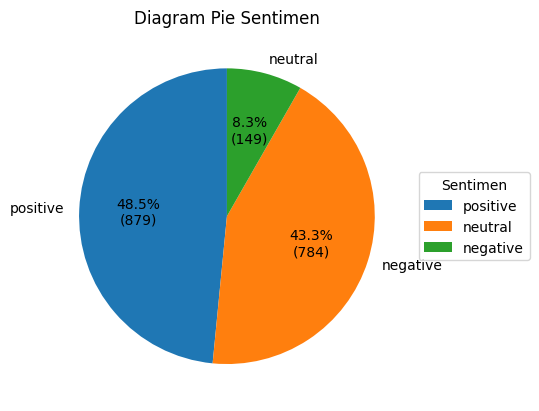

In [ ]:
import matplotlib.pyplot as plt

# Jumlah data untuk setiap sentimen
counts = df['sentiment'].value_counts()
percentages = counts / len(df) * 100
labels = list(counts.index)
sizes = list(counts)

# Warna yang sesuai: biru untuk positive, oranye untuk neutral, hijau untuk negative
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Membuat diagram pie tanpa border
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})'
)

# Menambahkan judul dan legenda
plt.title('Diagram Pie Sentimen')
plt.legend(labels=['positive', 'neutral', 'negative'], title="Sentimen", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Menampilkan plot
plt.show()


In [ ]:
# case folding mengubah huruf besar ke huruf kecil
df['case_folding'] = df['content'].str.lower()
df[['content', 'case_folding']]

,content,case_folding
0,"Mantap, pelayanan yang sangat istimewa seperti Jogja... ...orang jogja wajib pakai JogjaKita... Love Jogja and aLL oF YoU...","mantap, pelayanan yang sangat istimewa seperti jogja... ...orang jogja wajib pakai jogjakita... love jogja and all of you..."
1,Sukses terus buat jogjakita,sukses terus buat jogjakita
2,Setiap naik jogja kita motor nya tua tua semua yang aku naikin supra/shogun😌,setiap naik jogja kita motor nya tua tua semua yang aku naikin supra/shogun😌
3,pinaringan sehat lancar rejeki pak,pinaringan sehat lancar rejeki pak
4,mantap,mantap
...,...,...
1809,"Coba pembayaran pdam bantul bisa masuk apk ini,","coba pembayaran pdam bantul bisa masuk apk ini,"
1810,Mantab,mantab
1811,Ok,ok
1812,Akunnya kok dari akun bebasbayar?,akunnya kok dari akun bebasbayar?


In [ ]:
import re
from slang_data import SLANG_DATA as slang_word

pattern_huruf = r'\b(\w)\b'
pattern_spasi_ganda = r'\s+'
def remove_letter(letter):
    if letter in slang_word:
        return letter
    else:
        return ""

# menghapus simbol-simbol dan angka
df['clean'] = df['case_folding'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', x))
# menghapus satu huruf yang tidak penting
df['clean'] = df['clean'].apply(lambda x: re.sub(r'\b(\w)\b', lambda match: remove_letter(match.group(1)), x))
# mengubah spasi ganda menjadi satu spasi
df['clean'] = df['clean'].apply(lambda x: re.sub(r'\s+', ' ', x))
df[['case_folding', 'clean']]

,case_folding,clean
0,"mantap, pelayanan yang sangat istimewa seperti jogja... ...orang jogja wajib pakai jogjakita... love jogja and all of you...",mantap pelayanan yang sangat istimewa seperti jogja orang jogja wajib pakai jogjakita love jogja and all of you
1,sukses terus buat jogjakita,sukses terus buat jogjakita
2,setiap naik jogja kita motor nya tua tua semua yang aku naikin supra/shogun😌,setiap naik jogja kita motor nya tua tua semua yang aku naikin supra shogun
3,pinaringan sehat lancar rejeki pak,pinaringan sehat lancar rejeki pak
4,mantap,mantap
...,...,...
1809,"coba pembayaran pdam bantul bisa masuk apk ini,",coba pembayaran pdam bantul bisa masuk apk ini
1810,mantab,mantab
1811,ok,ok
1812,akunnya kok dari akun bebasbayar?,akunnya kok dari akun bebasbayar


In [ ]:
  import nltk
  nltk.download('punkt')
  # tokenisasi data ulasan
  df['token'] = df['clean'].apply(nltk.word_tokenize)
  df[['clean', 'token']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,clean,token
0,mantap pelayanan yang sangat istimewa seperti jogja orang jogja wajib pakai jogjakita love jogja and all of you,"[mantap, pelayanan, yang, sangat, istimewa, seperti, jogja, orang, jogja, wajib, pakai, jogjakita, love, jogja, and, all, of, you]"
1,sukses terus buat jogjakita,"[sukses, terus, buat, jogjakita]"
2,setiap naik jogja kita motor nya tua tua semua yang aku naikin supra shogun,"[setiap, naik, jogja, kita, motor, nya, tua, tua, semua, yang, aku, naikin, supra, shogun]"
3,pinaringan sehat lancar rejeki pak,"[pinaringan, sehat, lancar, rejeki, pak]"
4,mantap,[mantap]
...,...,...
1809,coba pembayaran pdam bantul bisa masuk apk ini,"[coba, pembayaran, pdam, bantul, bisa, masuk, apk, ini]"
1810,mantab,[mantab]
1811,ok,[ok]
1812,akunnya kok dari akun bebasbayar,"[akunnya, kok, dari, akun, bebasbayar]"


In [ ]:

# meload model word2vec
from gensim.models import word2vec, Word2Vec
model_cbow = Word2Vec.load(root_path + 'MODEL WORD2VEC/idwiki_word2vec_300_new_lower_plus_jogjakita_corpus_CBOW.model')

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def handle_pattern_ng_men(match):
    if match.group(2):
        return f"men{match.group(1)}kan"

    return f"men{match.group(1)}"

def handle_pattern_ng_meng(match):
    if match.group(2):
        return f"meng{match.group(1)}kan"

    return f"meng{match.group(1)}"

def handle_pattern_ng_mem(match):
    if match.group(2):
        return f"mem{match.group(1)}kan"

    return f"mem{match.group(1)}"


pattern_tetangga = r'(\w)\1+'
pattern_ng = r"\bng(\w+?)(in|kan)?\b"
pattern_in = r"\b(\w+)in\b"
pattern_huruf_ganda = r'(\w)\1+'
continue2 = False

def preprocessing_normalization(tokens):
    new_token = []
    continue2 = False
    for index_token, token in enumerate(tokens):

        if continue2:
            continue2 = False
            continue

        try:
            next_token = tokens[index_token + 1]
            two_words = token + " " + next_token
            if two_words in slang_word:
                continue2 = True
                new_word = slang_word[two_words]
                new_token.extend(new_word.split(" "))
                continue
        except IndexError:
            pass

        if token in slang_word:
            new_token.extend(slang_word[token].split(" "))
            continue

        if re.match(pattern_ng, token):
            token_men = re.sub(pattern_ng, handle_pattern_ng_men, token)
            token_meng = re.sub(pattern_ng, handle_pattern_ng_meng, token)
            token_mem = re.sub(pattern_ng, handle_pattern_ng_mem, token)

            token_stem_men = stemmer.stem(token_men)
            token_stem_meng = stemmer.stem(token_meng)
            token_stem_mem = stemmer.stem(token_mem)

            if token_stem_meng != token_meng:
                token = token_meng

            elif token_stem_men != token_men:
                token = token_men

            elif token_stem_mem != token_mem:
                token = token_mem

            new_token.append(token)
            continue

        if re.match(pattern_in, token):
            token_kan = re.sub(pattern_in, r"\1kan", token)
            token_stem_kan = stemmer.stem(token_kan)
            if token_kan != token_stem_kan:
                new_token.append(token_kan)
            else:
                new_token.extend(token.split(" "))

        else:
                new_token.extend(token.split(" "))
    return new_token
# melakukan normalisasi kata pada token
df['normalization'] = df['token'].apply(preprocessing_normalization)
df[['token', 'normalization']]

,token,normalization
0,"[mantap, pelayanan, yang, sangat, istimewa, seperti, jogja, orang, jogja, wajib, pakai, jogjakita, love, jogja, and, all, of, you]","[mantap, pelayanan, yang, sangat, istimewa, seperti, jogja, orang, jogja, wajib, pakai, jogjakita, suka, jogja, and, all, of, you]"
1,"[sukses, terus, buat, jogjakita]","[sukses, terus, buat, jogjakita]"
2,"[setiap, naik, jogja, kita, motor, nya, tua, tua, semua, yang, aku, naikin, supra, shogun]","[setiap, naik, jogjakita, motor, nya, tua, tua, semua, yang, aku, naikkan, supra, shogun]"
3,"[pinaringan, sehat, lancar, rejeki, pak]","[pinaringan, sehat, lancar, rejeki, pak]"
4,[mantap],[mantap]
...,...,...
1809,"[coba, pembayaran, pdam, bantul, bisa, masuk, apk, ini]","[coba, pembayaran, pdam, bantul, bisa, masuk, aplikasi, ini]"
1810,[mantab],[mantap]
1811,[ok],[ok]
1812,"[akunnya, kok, dari, akun, bebasbayar]","[akunnya, kok, dari, akun, bebas, bayar]"


In [ ]:
def token_to_sentence(token):
  return ' '.join(token)

def preprocessing_stemming(review):
    review = stemmer.stem(review)
    return nltk.word_tokenize(review)
df['normalization_join'] = df['normalization'].apply(token_to_sentence)
df['stemming'] = df['normalization_join'].apply(preprocessing_stemming)
df[['normalization', 'stemming']]

,normalization,stemming
0,"[mantap, pelayanan, yang, sangat, istimewa, seperti, jogja, orang, jogja, wajib, pakai, jogjakita, suka, jogja, and, all, of, you]","[mantap, layanan, yang, sangat, istimewa, seperti, jogja, orang, jogja, wajib, pakai, jogjakita, suka, jogja, and, all, of, you]"
1,"[sukses, terus, buat, jogjakita]","[sukses, terus, buat, jogjakita]"
2,"[setiap, naik, jogjakita, motor, nya, tua, tua, semua, yang, aku, naikkan, supra, shogun]","[tiap, naik, jogjakita, motor, nya, tua, tua, semua, yang, aku, naik, supra, shogun]"
3,"[pinaringan, sehat, lancar, rejeki, pak]","[paring, sehat, lancar, rejeki, pak]"
4,[mantap],[mantap]
...,...,...
1809,"[coba, pembayaran, pdam, bantul, bisa, masuk, aplikasi, ini]","[coba, bayar, pdam, bantul, bisa, masuk, aplikasi, ini]"
1810,[mantap],[mantap]
1811,[ok],[ok]
1812,"[akunnya, kok, dari, akun, bebas, bayar]","[akun, kok, dari, akun, bebas, bayar]"


In [ ]:
df['cleaning'] = df['stemming'].apply(token_to_sentence)
df = df.drop_duplicates(subset="cleaning")
df.to_csv(root_path + 'cleaning_dataset_autolabelling_indobert_review_jogjakita.csv', sep=",", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv(root_path + 'cleaning_dataset_autolabelling_indobert_review_jogjakita.csv')
df['cleaning'] = df['cleaning'].astype('str')

In [ ]:
df[['case_folding', 'clean', 'token', 'normalization', 'stemming', 'cleaning']].iloc[0:6]

,case_folding,clean,token,normalization,stemming,cleaning
0,"mantap, pelayanan yang sangat istimewa seperti jogja... ...orang jogja wajib pakai jogjakita... love jogja and all of you...",mantap pelayanan yang sangat istimewa seperti jogja orang jogja wajib pakai jogjakita love jogja and all of you,"['mantap', 'pelayanan', 'yang', 'sangat', 'istimewa', 'seperti', 'jogja', 'orang', 'jogja', 'wajib', 'pakai', 'jogjakita', 'love', 'jogja', 'and', 'all', 'of', 'you']","['mantap', 'pelayanan', 'yang', 'sangat', 'istimewa', 'seperti', 'jogja', 'orang', 'jogja', 'wajib', 'pakai', 'jogjakita', 'suka', 'jogja', 'and', 'all', 'of', 'you']","['mantap', 'layanan', 'yang', 'sangat', 'istimewa', 'seperti', 'jogja', 'orang', 'jogja', 'wajib', 'pakai', 'jogjakita', 'suka', 'jogja', 'and', 'all', 'of', 'you']",mantap layanan yang sangat istimewa seperti jogja orang jogja wajib pakai jogjakita suka jogja and all of you
1,sukses terus buat jogjakita,sukses terus buat jogjakita,"['sukses', 'terus', 'buat', 'jogjakita']","['sukses', 'terus', 'buat', 'jogjakita']","['sukses', 'terus', 'buat', 'jogjakita']",sukses terus buat jogjakita
2,setiap naik jogja kita motor nya tua tua semua yang aku naikin supra/shogun😌,setiap naik jogja kita motor nya tua tua semua yang aku naikin supra shogun,"['setiap', 'naik', 'jogja', 'kita', 'motor', 'nya', 'tua', 'tua', 'semua', 'yang', 'aku', 'naikin', 'supra', 'shogun']","['setiap', 'naik', 'jogjakita', 'motor', 'nya', 'tua', 'tua', 'semua', 'yang', 'aku', 'naikkan', 'supra', 'shogun']","['tiap', 'naik', 'jogjakita', 'motor', 'nya', 'tua', 'tua', 'semua', 'yang', 'aku', 'naik', 'supra', 'shogun']",tiap naik jogjakita motor nya tua tua semua yang aku naik supra shogun
3,pinaringan sehat lancar rejeki pak,pinaringan sehat lancar rejeki pak,"['pinaringan', 'sehat', 'lancar', 'rejeki', 'pak']","['pinaringan', 'sehat', 'lancar', 'rejeki', 'pak']","['paring', 'sehat', 'lancar', 'rejeki', 'pak']",paring sehat lancar rejeki pak
4,mantap,mantap,['mantap'],['mantap'],['mantap'],mantap
5,"kita seperti dipaksa untuk stay di grub customer, pdhal udah nggak pake jasanya lagi.. haduh",kita seperti dipaksa untuk stay di grub customer pdhal udah nggak pake jasanya lagi haduh,"['kita', 'seperti', 'dipaksa', 'untuk', 'stay', 'di', 'grub', 'customer', 'pdhal', 'udah', 'nggak', 'pake', 'jasanya', 'lagi', 'haduh']","['kita', 'seperti', 'dipaksa', 'untuk', 'stay', 'di', 'grub', 'customer', 'padahal', 'sudah', 'tidak', 'pakai', 'jasanya', 'lagi', 'aduh']","['kita', 'seperti', 'paksa', 'untuk', 'stay', 'di', 'grub', 'customer', 'padahal', 'sudah', 'tidak', 'pakai', 'jasa', 'lagi', 'aduh']",kita seperti paksa untuk stay di grub customer padahal sudah tidak pakai jasa lagi aduh


In [ ]:
counts

,count
sentiment,
negative,779
positive,613
neutral,148


In [ ]:
percentages

,count
sentiment,
negative,50.584416
positive,39.805195
neutral,9.610390


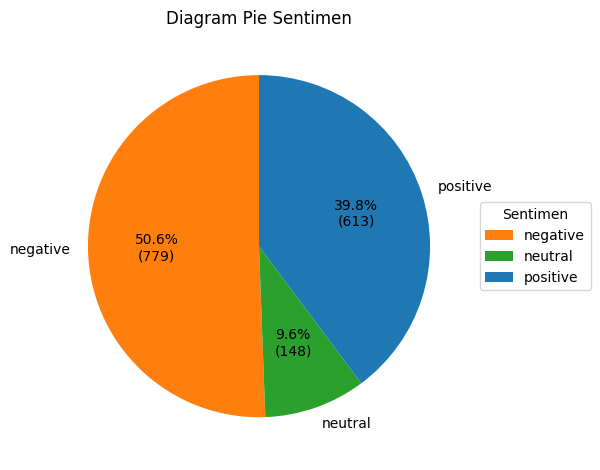

In [ ]:
import matplotlib.pyplot as plt

# Data sentimen dengan urutan yang diubah
data = {
    'negative': 779,
    'neutral': 148,
    'positive': 613
}

# Menghitung total dan persentase
total = sum(data.values())
labels = list(data.keys())
sizes = list(data.values())

# Warna sesuai urutan (hijau untuk negative, oranye untuk neutral, biru untuk positive)
colors = ['#2ca02c', '#ff7f0e', '#1f77b4']
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

# Membuat diagram pie
# plt.figure(figsize=(10, 8))

# Custom autopct untuk menampilkan persentase dan jumlah data manual
def make_autopct(values):
    def my_autopct(pct):
        # Mendapatkan index data berdasarkan persentase
        total = sum(values)
        val = int(round(pct*total/100.0))
        # Mengembalikan format string dengan persentase dan nilai yang sesuai
        return f'{pct:.1f}%\n({val})'
    return my_autopct

patches, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    startangle=90,
    autopct=make_autopct(sizes),
    labels=labels
)

# Mengatur posisi label agar sesuai
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')

# Menambahkan judul
plt.title('Diagram Pie Sentimen')

# Menambahkan legenda dengan urutan yang sama
plt.legend(
    labels=['negative', 'neutral', 'positive'],
    title="Sentimen",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Memastikan layout yang rapi
plt.tight_layout()

# Menampilkan plot
plt.show()